In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('exam_data.csv', encoding='utf-8')

In [5]:
df.head(20)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,1/22/2020,0,0,0,0,0,0,0
1,1/23/2020,0,0,0,0,0,0,0
2,1/24/2020,0,0,0,0,0,0,0
3,1/25/2020,0,0,0,0,0,0,0
4,1/26/2020,0,0,0,0,0,0,0
5,1/27/2020,0,0,0,0,0,0,0
6,1/28/2020,0,0,0,0,0,0,0
7,1/29/2020,0,0,0,0,0,0,0
8,1/30/2020,0,0,0,0,0,0,0
9,1/31/2020,0,0,0,0,0,0,0


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Assuming df is your DataFrame
# Replace 'Active' with the actual name of your target column
X = np.array(df.Active).reshape(-1, 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train / Test split (initial only)
train_data, test_data = train_test_split(X_scaled, test_size=0.2, shuffle=False)
print(train_data.shape, test_data.shape)

def get_XY(dat, time_steps):
    # Prepare Y
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]

    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))

    return X, Y

time_steps = 3
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(trainX, trainY, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
mse = model.evaluate(testX, testY)
print(f'Mean Squared Error on test data: {mse}')

# Make predictions
predictions = model.predict(testX)

# Inverse transform the predictions to get them back to the original scale
predictions = scaler.inverse_transform(predictions)

# Print the predictions
print(predictions)



D:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(150, 1) (38, 1)
Epoch 1/50
2/2 [==============================] - 3s 1s/step - loss: 0.0148 - val_loss: 0.0058
Epoch 2/50
2/2 [==============================] - 0s 102ms/step - loss: 0.0137 - val_loss: 0.0049
Epoch 3/50
2/2 [==============================] - 0s 90ms/step - loss: 0.0126 - val_loss: 0.0041
Epoch 4/50
2/2 [==============================] - 0s 107ms/step - loss: 0.0115 - val_loss: 0.0034
Epoch 5/50
2/2 [==============================] - 0s 103ms/step - loss: 0.0107 - val_loss: 0.0028
Epoch 6/50
2/2 [==============================] - 0s 64ms/step - loss: 0.0099 - val_loss: 0.0023
Epoch 7/50
2/2 [==============================] - 0s 60ms/step - loss: 0.0091 - val_loss: 0.0019
Epoch 8/50
2/2 [==============================] - 0s 52ms/step - loss: 0.0083 - val_loss: 0.0015
Epoch 9/50
2/2 [==============================] - 0s 53ms/step - loss: 0.0078 - val_loss: 0.0012
Epoch 10/50
2/2 [==============================] - 0s 69ms/step - loss: 0.0072 - val_loss: 9.2480e-04
Epoch 1

In [7]:
trainX

array([[[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[2.74891418e-05],
        [2.74891418e-05],
        [2.74891418e-05]],

       [[2.74891418e-05],
        [2.74891418e-05],
        [5.49782836e-05]],

       [[5.49782836e-05],
        [8.246

# Testing

In [8]:
output = pd.DataFrame()
output['pred'] = pd.Series(scaler.inverse_transform(model.predict(trainX))[:, 0])
output['true'] = scaler.inverse_transform(trainX[:, -1])[:, 0]

2/2 [==============================] - 0s 4ms/step


In [9]:
output

,pred,true
0,182.272598,0.0
1,182.272598,0.0
2,182.272598,0.0
3,182.272598,0.0
4,182.272598,0.0
5,182.272598,0.0
6,182.272598,0.0
7,182.272598,0.0
8,182.272598,0.0
9,182.272598,0.0


Text(0.5, 1.0, 'train')

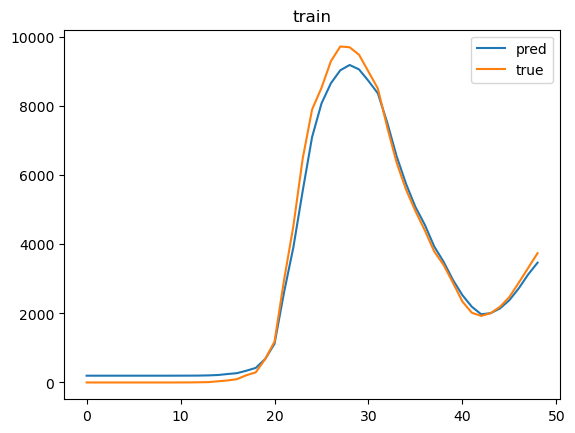

In [195]:
from matplotlib import pyplot as plt

output.plot()

plt.title('train')

In [196]:
output = pd.DataFrame()
output['pred'] = pd.Series(scaler.inverse_transform(model.predict(testX))[:, 0])
output['true'] = scaler.inverse_transform(testX[:, -1])[:, 0]

1/1 [==============================] - 0s 30ms/step


In [197]:
output

,pred,true
0,4690.183105,5014.0
1,5511.921387,6084.0
2,5785.001953,6363.0
3,7297.386230,8483.0
4,9255.917969,11024.0
5,10669.717773,13653.0
6,12417.415039,17302.0
7,14132.878906,20872.0
8,16343.157227,25305.0
9,18255.394531,28205.0


Text(0.5, 1.0, 'test')

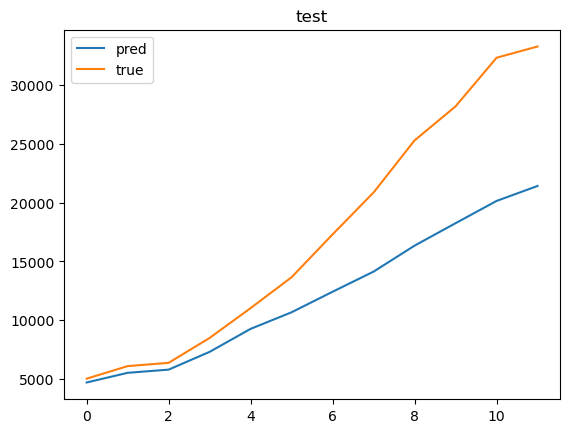

In [198]:
output.plot()

plt.title('test')

# Specific date prediction

In [2]:
specific_date = '18/12/2023'
today_data = pd.DataFrame({'Date': [specific_date]})

today_data_merged = pd.merge(today_data, df, on='Date', how='left')

# Extract the 'Active' column and scale it
today_active = today_data_merged['Active'].values.reshape(-1, 1)
today_active_scaled = scaler.transform(today_active)

# Convert the input data to float32 (if not already)
today_active_scaled = today_active_scaled.astype('float32')

# Prepare today's input data
today_input = today_active_scaled.reshape(1, today_active_scaled.shape[0], today_active_scaled.shape[1])

# Make predictions for today
today_prediction_scaled = model.predict(today_input)
today_prediction = scaler.inverse_transform(today_prediction_scaled)

print(f"Predicted Active Cases for {specific_date}: {today_prediction[0, 0]}")


NameError: name 'pd' is not defined